# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "Metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&q=" + city + "&units=" + unit
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json= city_weather.json()
        #print(city_json)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json['coord']['lat']
        city_lng = city_json['coord']['lon']
        city_max_temp = city_json['main']['temp_max']
        city_humidity = city_json['main']['humidity']
        city_clouds = city_json['clouds']['all']
        city_wind = city_json['wind']['speed']
        city_country = city_json['sys']['country']
        city_date = city_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bhuban
Processing Record 2 of Set 1 | dudinka
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | ijuw
City not found. Skipping...
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | massawa
Processing Record 8 of Set 1 | shangzhi
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | yeppoon
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | goz beida
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | usogorsk
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | lompoc
Processing Record 19 of Set 1 | fale old settlement
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | padang
Processing Record 

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bhuban,20.8833,85.8333,26.85,87,100,1.39,IN,1696184126
1,dudinka,69.4058,86.1778,-14.07,100,70,1.79,RU,1696184126
2,papatowai,-46.5619,169.4708,10.26,82,92,4.17,NZ,1696184126
3,iqaluit,63.7506,-68.5145,4.85,75,75,2.06,CA,1696184126
4,massawa,15.6097,39.4500,32.81,53,4,2.05,ER,1696184127


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bhuban,20.8833,85.8333,26.85,87,100,1.39,IN,1696184126
1,dudinka,69.4058,86.1778,-14.07,100,70,1.79,RU,1696184126
2,papatowai,-46.5619,169.4708,10.26,82,92,4.17,NZ,1696184126
3,iqaluit,63.7506,-68.5145,4.85,75,75,2.06,CA,1696184126
4,massawa,15.6097,39.4500,32.81,53,4,2.05,ER,1696184127


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

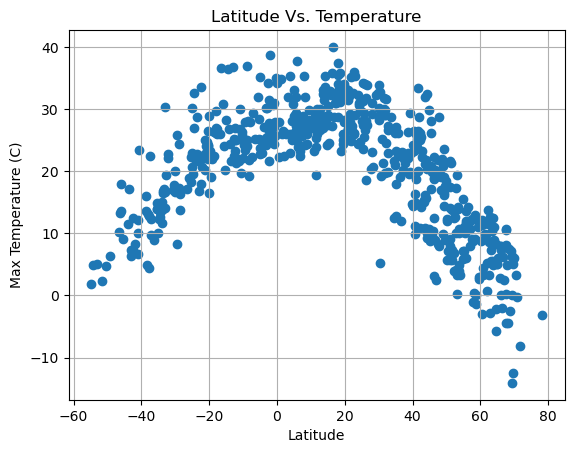

In [60]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Latitude Vs. Temperature")
plt.grid()

# Incorporate the other graph properties

#add title and grid lines
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

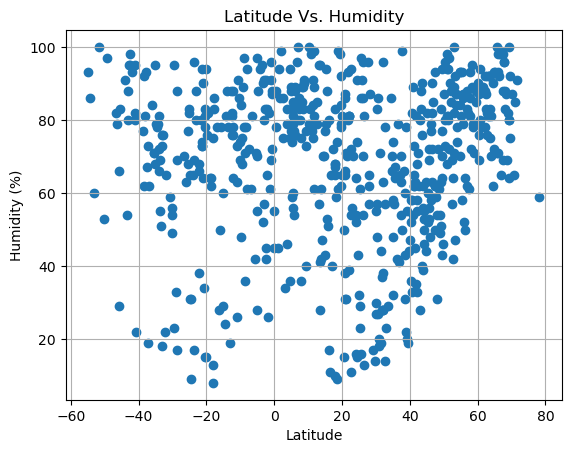

In [61]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude Vs. Humidity")
plt.grid()

# Incorporate the other graph properties


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

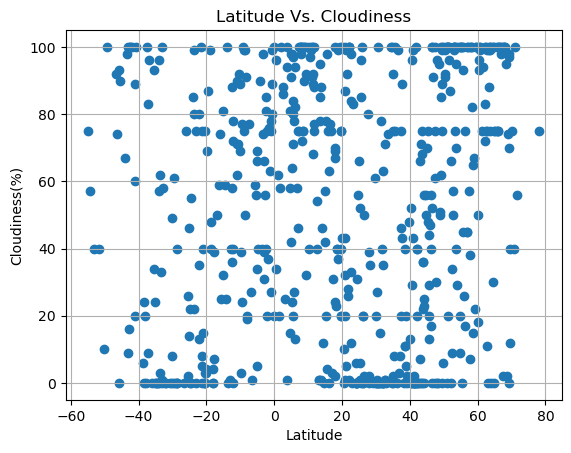

<Figure size 640x480 with 0 Axes>

In [62]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()
plt.title("Latitude Vs. Cloudiness")
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

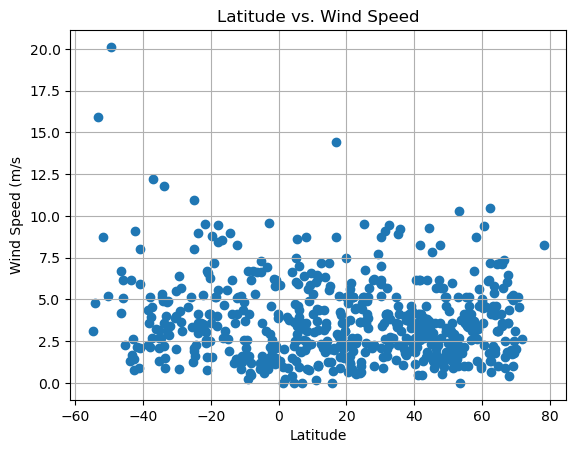

In [63]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s')
plt.grid()
plt.title("Latitude vs. Wind Speed")


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def plot_linear(x,y,ylable,location):
    x_values = x
    y_values = y
    plt.scatter(x_values,y_values)
    plt.xlabel('Latitude')
    plt.ylabel(ylable)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, location, fontsize=15,color="red")

    plt.show()

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bhuban,20.8833,85.8333,26.85,87,100,1.39,IN,1696184126
1,dudinka,69.4058,86.1778,-14.07,100,70,1.79,RU,1696184126
3,iqaluit,63.7506,-68.5145,4.85,75,75,2.06,CA,1696184126
4,massawa,15.6097,39.4500,32.81,53,4,2.05,ER,1696184127
5,shangzhi,45.2167,127.9667,8.81,82,70,2.66,CN,1696184127


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,papatowai,-46.5619,169.4708,10.26,82,92,4.17,NZ,1696184126
6,port-aux-francais,-49.3500,70.2167,6.29,97,100,20.12,TF,1696184127
7,blackmans bay,-43.0167,147.3167,6.40,88,9,2.62,AU,1696184127
8,yeppoon,-23.1333,150.7333,16.88,80,0,3.30,AU,1696184127
9,adamstown,-25.0660,-130.1015,20.61,83,46,10.95,PN,1696184127


###  Temperature vs. Latitude Linear Regression Plot

y = -0.44x +35.7


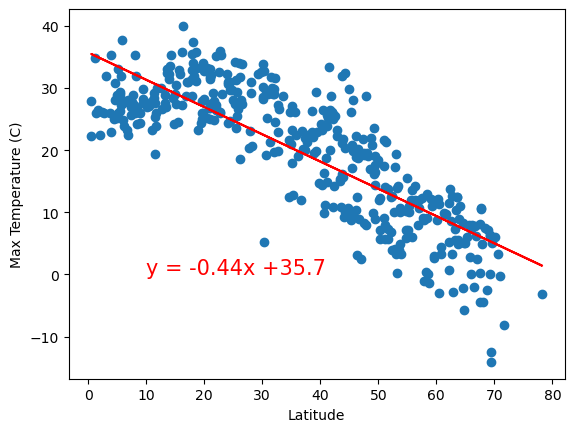

In [47]:
# Linear regression on Northern Hemisphere

plot_linear(northern_hemi['Lat'],northern_hemi['Max Temp'], 'Max Temperature (C)', (10,0) )

y = 0.44x +30.85


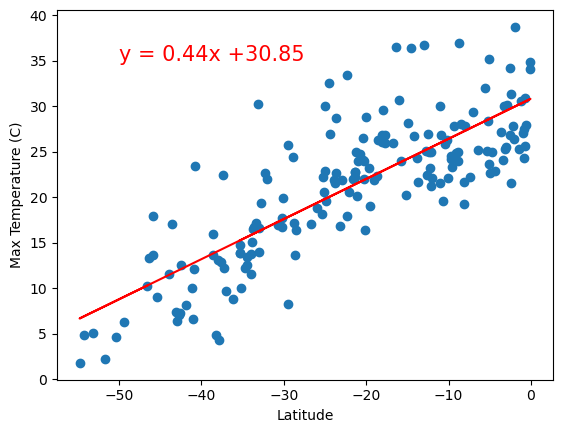

In [48]:
# Linear regression on Southern Hemisphere
plot_linear(southern_hemi['Lat'],southern_hemi['Max Temp'], 'Max Temperature (C)', (-50,35) )

**Discussion about the linear relationship:** For northern hemisphere there is a negative relationship but a postive relationship in the northern hemisphere. This makes sense because the graphs show that the max temperature is higher where latitude is 0, which is the equator and gets lower as you move away from it. 

### Humidity vs. Latitude Linear Regression Plot

y = 0.18x +62.27


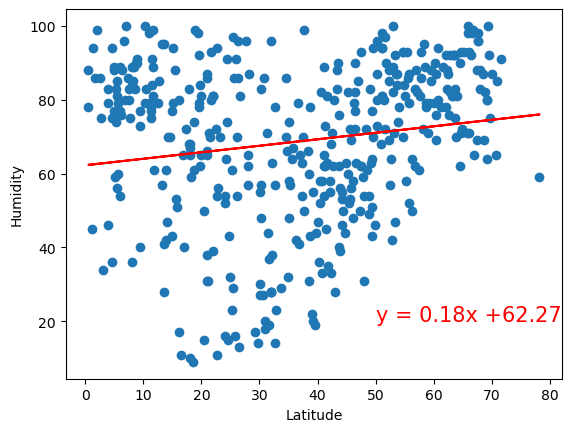

In [52]:
# Northern Hemisphere
plot_linear(northern_hemi['Lat'], northern_hemi['Humidity'], 'Humidity', (50,20) )

y = -0.07x +66.61


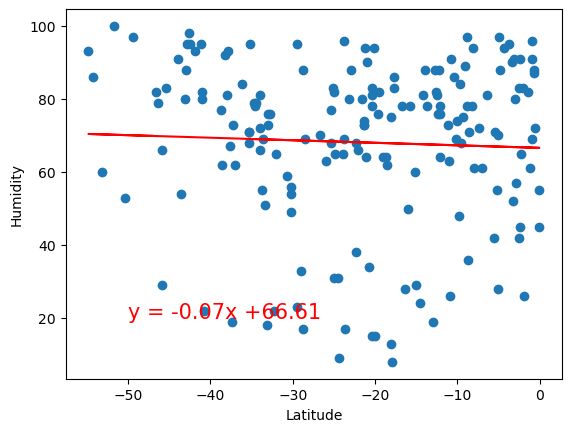

In [53]:
# Southern Hemisphere
plot_linear(southern_hemi['Lat'], southern_hemi['Humidity'], 'Humidity', (-50,20) )

**Discussion about the linear relationship:** Humidity in both hemispheres are both scattered but according to the slope the closer you are to equator the less humid it is, although only slightly. 

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.17x +48.25


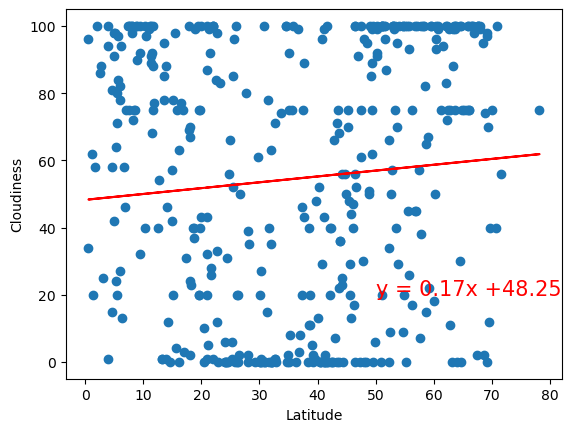

In [54]:
# Northern Hemisphere
plot_linear(northern_hemi['Lat'], northern_hemi['Cloudiness'], 'Cloudiness', (50,20) )

y = 0.28x +52.26


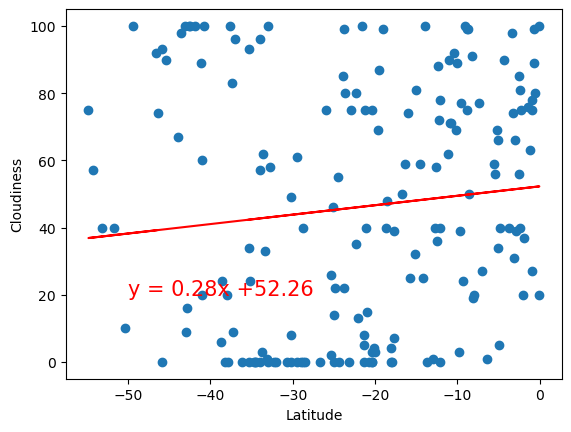

In [55]:
# Southern Hemisphere
plot_linear(southern_hemi['Lat'], southern_hemi['Cloudiness'], 'Cloudiness', (-50,20) )

**Discussion about the linear relationship:** For cloudiness both graphs have a positive slope, which tells us that as you move north, in each hemisphere, cloudiness increases. 

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.0x +3.43


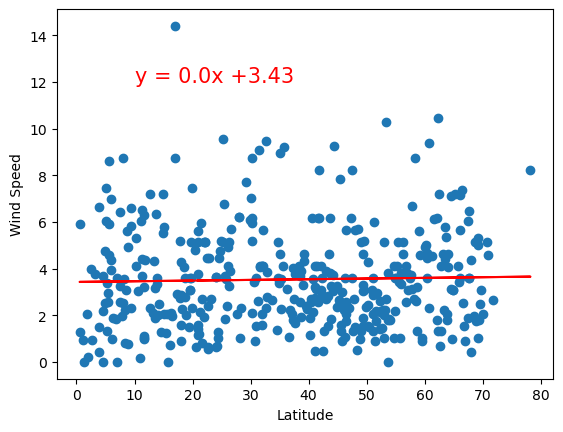

In [56]:
# Northern Hemisphere
plot_linear(northern_hemi['Lat'], northern_hemi['Wind Speed'], 'Wind Speed', (10,12) )

y = -0.04x +3.2


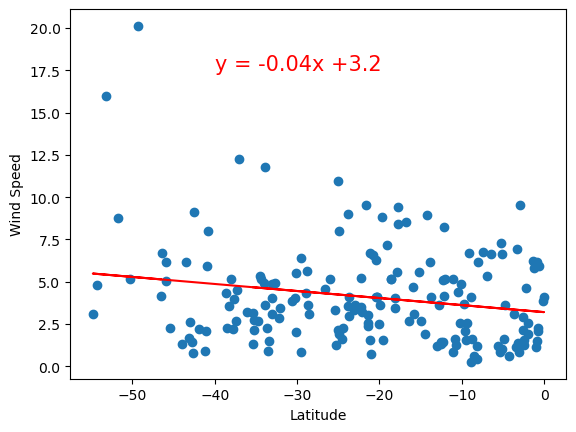

In [58]:
# Southern Hemisphere
plot_linear(southern_hemi['Lat'], southern_hemi['Wind Speed'], 'Wind Speed', (-40,17.5) )

**Discussion about the linear relationship:** Based on the regression lines for both hemispheres, wind speed does not change much based on latitude in either the northern or southern hemisphere